In [2]:
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
%matplotlib inline

In [3]:
gdpDF = pd.read_csv("gdp_growth.csv")
suicideDF = pd.read_csv("suicides.csv")
alcoholDF = pd.read_csv("alcoholConsumption.csv")

In [4]:
gdpDF["date"] = pd.to_datetime(gdpDF["Month"], format="%Y%b")
gdpDF.head()

,Month,Monthly GDP,date
0,1997JAN,64.3701,1997-01-01
1,1997FEB,65.2410,1997-02-01
2,1997MAR,65.5841,1997-03-01
3,1997APR,65.7258,1997-04-01
4,1997MAY,65.2434,1997-05-01


In [5]:
suicideDF["date"] = pd.to_datetime(suicideDF["Year"], format="%Y")
suicideDF.head()

,Year,Deaths,date
0,2019,5691,2019-01-01
1,2018,5420,2018-01-01
2,2017,4840,2017-01-01
3,2016,4941,2016-01-01
4,2015,5199,2015-01-01


In [6]:
alcoholDF["date"] = pd.to_datetime(alcoholDF["Year"], format="%Y")
alcoholDF.head()

,Year,ml per week,date
0,2012,700,2012-01-01
1,2011,728,2011-01-01
2,2010,762,2010-01-01
3,2009,744,2009-01-01
4,2008,706,2008-01-01


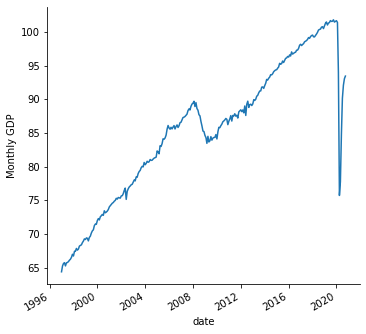

In [7]:
g = sns.relplot(x="date", y="Monthly GDP", kind="line", data=gdpDF)
g.fig.autofmt_xdate()
plt.show()

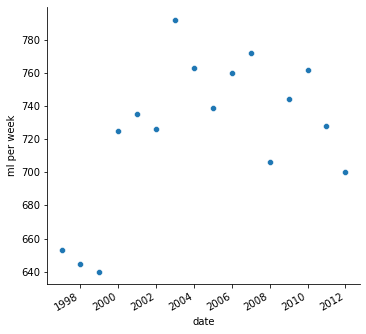

In [17]:
g = sns.relplot(x="date", y="ml per week", data=alcoholDF)
g.fig.autofmt_xdate()
plt.show()

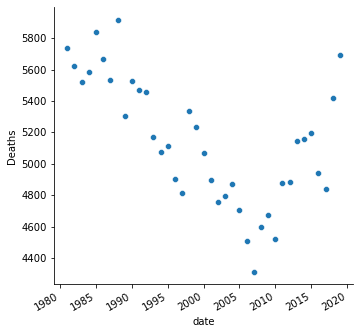

In [9]:
g = sns.relplot(x="date", y="Deaths", data=suicideDF)
g.fig.autofmt_xdate()
plt.show()

In [10]:
gdpSuicideDF = gdpDF.merge(suicideDF, on="date")
gdpSuicideDF.head()

,Month,Monthly GDP,date,Year,Deaths
0,1997JAN,64.3701,1997-01-01,1997,4816
1,1998JAN,66.7171,1998-01-01,1998,5339
2,1999JAN,69.1636,1999-01-01,1999,5235
3,2000JAN,71.9840,2000-01-01,2000,5070
4,2001JAN,74.0075,2001-01-01,2001,4896


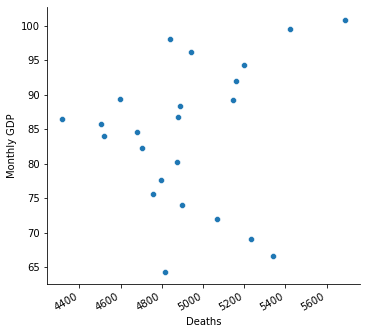

In [11]:
g = sns.relplot(x="Deaths", y="Monthly GDP", data=gdpSuicideDF)
g.fig.autofmt_xdate()
plt.show()

In [12]:
gdpAlcoholDF = gdpDF.merge(alcoholDF, on="date")
gdpAlcoholDF.head()

,Month,Monthly GDP,date,Year,ml per week
0,1997JAN,64.3701,1997-01-01,1997,653
1,1998JAN,66.7171,1998-01-01,1998,645
2,1999JAN,69.1636,1999-01-01,1999,640
3,2000JAN,71.9840,2000-01-01,2000,725
4,2001JAN,74.0075,2001-01-01,2001,735


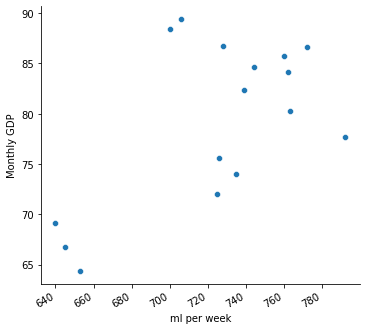

In [13]:
g = sns.relplot(x="ml per week", y="Monthly GDP", data=gdpAlcoholDF)
g.fig.autofmt_xdate()
plt.show()

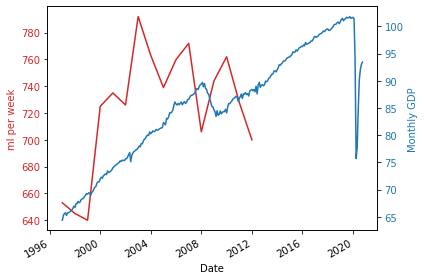

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('ml per week', color=color)
ax1.plot(gdpAlcoholDF["date"], gdpAlcoholDF["ml per week"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly GDP', color=color)  # we already handled the x-label with ax1
ax2.plot(gdpDF["date"], gdpDF["Monthly GDP"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()